Calculate the mean, median, mode and standard deviation for the problem
statements 1& 2.

**Problem Statement 1:**
    
    The marks awarded for an assignment set for a Year 8 class of 20 students were as
    follows: 6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8

In [364]:
import numpy as np
from scipy import stats

import statistics


In [365]:
marks = np.asarray([6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8])

In [366]:
def printStatistics(inputParameter):
    print('mean: ',np.mean(inputParameter))
    print('median: ',np.median(inputParameter))
    print('mode using scipy :',stats.mode(inputParameter))
    print('it returns first mode :',statistics.mode(inputParameter))
    print('Standard Deviation:', statistics.stdev(inputParameter))
    print('Standard Deviation using numpy:', np.std(inputParameter))
    
printStatistics(marks)

mean:  6.85
median:  7.0
mode using scipy : ModeResult(mode=array([7]), count=array([5]))
it returns first mode : 7
Standard Deviation: 1.4142135623730951
Standard Deviation using numpy: 1.5898113095584647


**Problem Statement 2:**
    
The number of calls from motorists per day for roadside service was recorded for a
particular month:
    
28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109

In [367]:
nr_of_calls =np.asarray([28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109])

printStatistics(nr_of_calls)

mean:  107.51428571428572
median:  100.0
mode using scipy : ModeResult(mode=array([75]), count=array([4]))
it returns first mode : 75
Standard Deviation: 39.331920878594275
Standard Deviation using numpy: 38.77287080168403


**Problem Statement 3:**

The number of times I go to the gym in weekdays, are given below along with its associated probability:

x = 0, 1, 2, 3, 4, 5

f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01

Calculate the mean no. of workouts in a week. Also evaluate the variance involved in it.




In [368]:
x = np.asarray([0,1,2,3,4,5])
fx = np.array([0.09,0.15,0.40,0.25,0.10,0.01])

In [369]:
mean_formula = sum([x[i]*fx[i] for i in range(len(x))])

variance_formula = (sum([((x[i]-mean)**2)*fx[i] for i in range(len(x))]))
print("workouts Mean usimg formula:", mean_formula)
print("workouts Variance usimg formula:", variance_formula)


print("****************************************")

mean=np.dot(x,fx)
variance_of_x=(x-mean)**2
variance = np.dot(variance_of_x.reshape(1,-1),fx)
print("workouts Mean using numpy:", mean)
print("workouts Variance using numpy:", variance)




workouts Mean usimg formula: 2.15
workouts Variance usimg formula: 1.2500000000000002
****************************************
workouts Mean using numpy: 2.15
workouts Variance using numpy: [1.2275]


**Problem Statement 4:**
    
Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF (d) =
20e−20(d−12.5), d ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm? What is your conclusion regarding the proportion of scraps?

In [370]:
from scipy import integrate

import warnings

#suppress warnings
warnings.filterwarnings('ignore')
PDF=lambda d:20*(np.exp((-20*(d-12.5))))
x = 12.6
P_x=integrate.quad(PDF,x,np.inf)
y = 11
CDF=integrate.quad(PDF,-np.inf,y)
print(f"Parts need to scrapped when d >12.6mm is :{P_x[0]}, {P_x[1]}")

print(f"CDF when d= 11mm is:{CDF[0]},{CDF[1]}")




Parts need to scrapped when d >12.6mm is :0.13533528323661398, 1.4196407407851444e-09
CDF when d= 11mm is:inf,inf


**Conclusion:**

The given function [PDF (𝑑) = 20𝑒−20(𝑑−12.5)] is to achieve 12.5 mm diameter for an aluminum sheet.

If a part with diameter < 12.5, then the part should be reworked. 

PDF is not defined for d=11

If the diameter ≥ 12.5 12.5 mm the proportion of scraps follow the equation: 1-e^{-20(x-12.5)}

**Problem Statement 5:**

A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6
chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?
Calculate the average value of this process. Also evaluate the standard deviation
associated with it.

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import scipy.special

In [372]:
x = int(input('Enter a number for faulty LED bulbs: '))/100  #faulty = x/100
y = 1-x #not faulty = 1-x
n=int(input('Select random number to choose LEDs: ')) # randomly select 6 chosen LEDs

df=pd.DataFrame({'x':[int(i) for i in range(int(n)+1)],
                 'fx':[scipy.special.comb(n,i)*(x**i)*(y**(n-i)) for i in range(int(n)+1)]})
print(df)

Enter a number for faulty LED bulbs: 30
Select random number to choose LEDs: 6
   x        fx
0  0  0.117649
1  1  0.302526
2  2  0.324135
3  3  0.185220
4  4  0.059535
5  5  0.010206
6  6  0.000729


x     2.000000
fx    0.324135
Name: 2, dtype: float64


Text(0, 0.5, 'Faulty Probability')

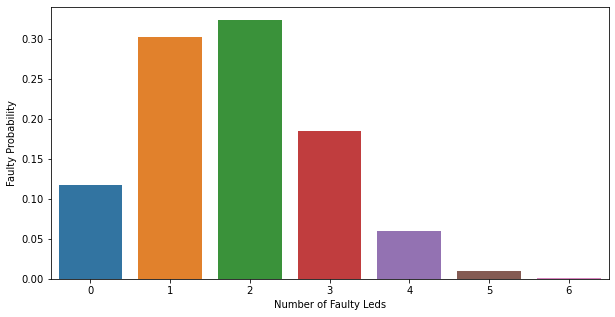

In [373]:
warnings.simplefilter(action="ignore", category=FutureWarning)

print(df.iloc[2])
plt.figure(figsize=(10,5))
sns.barplot('x','fx',data=df)
plt.xlabel('Number of Faulty Leds')
plt.ylabel('Faulty Probability')

In [374]:
df.Result=df.x*df.fx
mean=np.round(df.Result.sum())
print('mean',mean)
df['variance']=((df.x-mean)**2)*df.fx
std=np.sqrt(df.variance.sum())
print("Standard Deviation : ",np.round(std))

mean 2.0
Standard Deviation :  1.0


       ***************************Alternative Solution for Problem Statement 5 *****************

In [375]:
from scipy.stats import binom
p = int(input('Enter a number for faulty LED bulbs: '))/100  #faulty = x/100

n=int(input('Select random number to choose LEDs: ')) # randomly select 6 chosen LEDs

size=int(input('Please enter total number of LED bulbs: '))
bn = sum(np.random.binomial(n, p, size) == 2)/size
print('bn:',bn)

mean_1 , variance_1 = binom.stats(n, p)
std_1 = variance_1**0.5
print('Mean is',np.round(mean_1))
print('Standard deviation for this process is',np.round(std_1))

Enter a number for faulty LED bulbs: 30
Select random number to choose LEDs: 6
Please enter total number of LED bulbs: 50000
bn: 0.32308
Mean is 2.0
Standard deviation for this process is 1.0


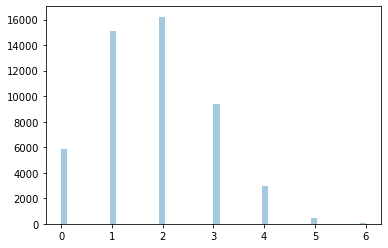

In [376]:
sns.distplot(np.random.binomial(n, p, size), hist=True, kde=False)

plt.show()

**Problem Statement 6:**

Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to
solve 8 questions per day with a correction rate of 75%, while Barakha averages
around 12 questions per day with a correction rate of 45%. What is the probability
that each of them will solve 5 questions correctly? What happens in cases of 4 and 6
correct solutions? What do you infer from it? What are the two main governing
factors affecting their ability to solve questions correctly? Give a pictorial
representation of the same to validate your answer.

In [377]:
#Gaurav- avg=8,p1=0.75
#Barakha- avg=12,p2=0.45
P_G_5 = binom.pmf(5,8,0.75) #G(5)
P_B_5 = binom.pmf(5,12,0.45)#B(5)
P_5_together = P_G_5 * P_B_5 #G(5)*B(5)

P_G_4 = binom.pmf(4,8,0.75)#G(4)
P_B_4 = binom.pmf(4,12,0.45)#B(4)
P_G_6 = binom.pmf(6,8,0.75)#G(4)
P_B_6 = binom.pmf(6,12,0.45)#B(6)
P_4_6_together = P_G_4 * P_B_6 #G(4)*B(6)


print(f"The probability that each of them will solve 5 questions correctly:{P_5_together}")
print(f"The probability that each of them will solve 4 and 6 questions correctly:{P_4_6_together}")


The probability that each of them will solve 5 questions correctly:0.04619989057299213
The probability that each of them will solve 4 and 6 questions correctly:0.018374956477894576


In [378]:

def gauravBinomialPlot(n,p):
    fig,ax=plt.subplots(1,1)
    x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
    ax.plot(x, binom.pmf(x, n, p), 'r', ms=8, label='binom pmf')
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='g', lw=5, alpha=0.5)
    plt.xlabel('Number of questions solved correctly')
    plt.ylabel('Probability of solving')
    

def barakhaBinomialPlot(n,p):
    fig,ax=plt.subplots(1,1)
    x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
    ax.plot(x, binom.pmf(x, n, p), 'y', ms=8, label='binom pmf')
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='c', lw=5, alpha=0.5)
    plt.xlabel('Number of questions solved correctly')
    plt.ylabel('Probability of solving')

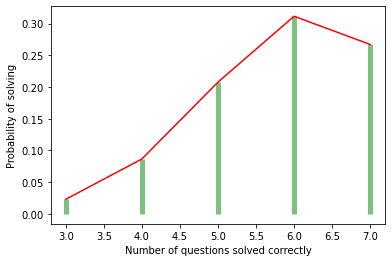

In [379]:
#Gaurav
gauravBinomialPlot(8,0.75)

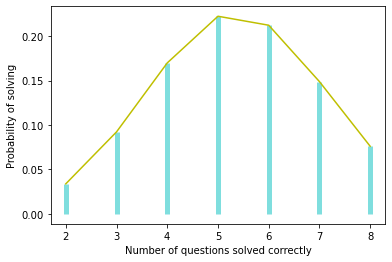

In [380]:
#Barakha
barakhaBinomialPlot(12,0.45)

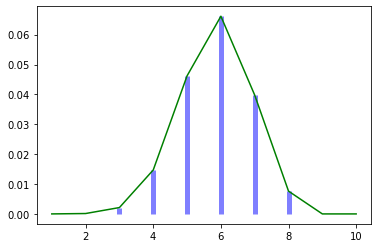

In [381]:
fig,ax=plt.subplots(1,1)
x = np.arange(1,11)
ax.plot(x, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), 'g', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), colors='b', lw=5, alpha=0.5)


In [382]:
P_5_together

0.04619989057299213

In [383]:
print('Probability to solve 4 correctly for Gaurav is', P_G_4)
print('Probability to solve 6 correctly for Gaurav is', P_G_6)
print('Probability to solve 4 correctly for Barkha is', P_B_4)
print('Probability to solve 6 correctly for Barkha is', P_B_6)



Probability to solve 4 correctly for Gaurav is 0.08651733398437506
Probability to solve 6 correctly for Gaurav is 0.31146240234375017
Probability to solve 4 correctly for Barkha is 0.16996393213605795
Probability to solve 6 correctly for Barkha is 0.21238468214026424


**The two main factors affecting the ability to solve questions correctly are:**

1) Correction rate

2) Number of questions solved per day

The correction rate increases the chances of the distribution to be left skewed increases. 

As the number of questions increases the distribution skewness decreases.

**Problem Statement 7:**

Customers arrive at a rate of 72 per hour to my shop. What is the probability of k
customers arriving in 4 minutes? a) 5 customers, b) not more than 3 customers, c)
more than 3 customers. Give a pictorial representation of the same to validate your answer.

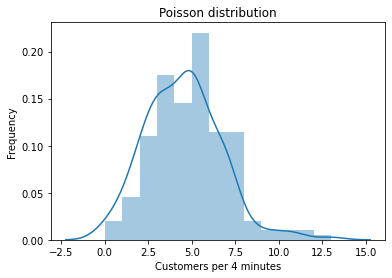

The probability of arriving 5 cutomers in 4 minutes : 0.17474768364388296
The probability of arriving not more than 3 customers in 4 minutes: 0.15169069760753714
The Probability of more than 3 customers arriving in 4 minutes is : 1.0


In [384]:
from scipy.stats import poisson
import seaborn as sb


mu = 4*(72/60) #customers come per 4 minutes

binomial = poisson.rvs(mu=mu, size=200)

ax = sb.distplot(binomial)
ax.set(xlabel='Customers per 4 minutes', ylabel='Frequency')
plt.title('Poisson distribution')
plt.show()

print("The probability of arriving 5 cutomers in 4 minutes :", poisson.pmf(k=5,mu=mu))
print("The probability of arriving not more than 3 customers in 4 minutes:", poisson.pmf(k=3, mu=mu))
print("The Probability of more than 3 customers arriving in 4 minutes is :", round(1-poisson.cdf(k=3,mu=mu)))



The probability of arriving 5 cutomers in 4 minutes : 0.17474768364388296
The probability of arriving not more than 3 customers in 4 minutes: 0.15169069760753714
The Probability of more than 3 customers arriving in 4 minutes is : 0.2942299164965642


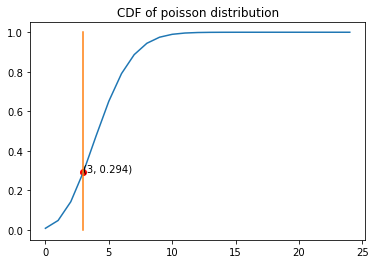

In [385]:
import matplotlib.cm as cm
x = np.arange(0,25)
prob = poisson.cdf(x, mu)
y =  prob[3]

print("The probability of arriving 5 cutomers in 4 minutes :", poisson.pmf(k=5,mu=mu))
print("The probability of arriving not more than 3 customers in 4 minutes:", poisson.pmf(k=3, mu=mu))
print("The Probability of more than 3 customers arriving in 4 minutes is :", y)



plt.plot(prob)
plt.plot((3,3),(0,1))

plt.scatter(3, y, color='r')

plt.text(3,y,'({}, {})'.format(3, round(y,3)))
plt.title('CDF of poisson distribution')

plt.show()



**Problem Statement 8:**

I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make
reports, where I have the efficiency of entering 77 words per minute with 6 errors per
hour. What is the probability that I will commit 2 errors in a 455-word financial report?
What happens when the no. of words increases/decreases (in case of 1000 words,
255 words)?
How is the λ affected?
How does it influence the PMF?
Give a pictorial representation of the same to validate your answer.



The pobability of commiting 2 errors in 455 words financial report is : 0.09669027375144444
The pobability of commiting 2 errors in 1000 words financial report is : 0.23012815007300153
The pobability of commiting 2 errors in 255 words financial report is : 0.039377135392854104


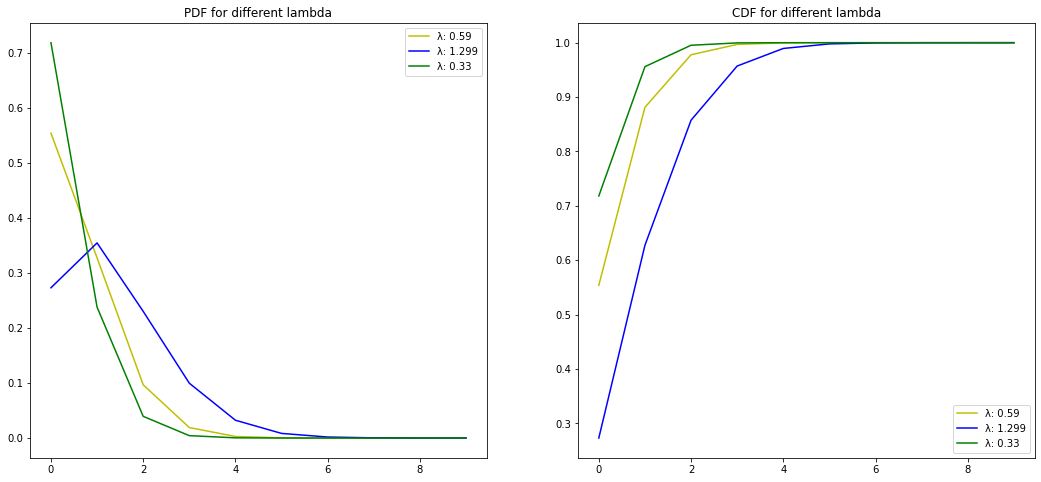

In [386]:

error_mu=0.1/77
def getMu(n):
    return n * error_mu
print("The pobability of commiting 2 errors in 455 words financial report is :",poisson.pmf(2,mu=getMu(455)))
print(f"The pobability of commiting 2 errors in 1000 words financial report is :",poisson.pmf(2,mu=getMu(1000)))
print(f"The pobability of commiting 2 errors in 255 words financial report is :",poisson.pmf(2,mu=getMu(255)))
x=np.arange(0,10)
fig = plt.figure(figsize=(18, 8))
x = np.arange(0,10)
mu_pdf_1 = poisson.pmf(x,mu=getMu(455))
mu_pdf_2 = poisson.pmf(x,mu=getMu(1000))
mu_pdf_3 = poisson.pmf(x,mu=getMu(255))
plt.subplot(1,2,1)
plt.plot(x, mu_pdf_1, 'y-', label='λ: 0.59')
plt.plot(x, mu_pdf_2, 'b-', label='λ: 1.299')
plt.plot(x, mu_pdf_3, 'g-', label='λ: 0.33')
plt.legend()
plt.title('PDF for different lambda')
plt.subplot(1, 2, 2)
x = np.arange(0,10)
mu_cdf_1 = poisson.cdf(x,mu=getMu(455))
mu_cdf_2 = poisson.cdf(x,mu=getMu(1000))
mu_cdf_3 = poisson.cdf(x,mu=getMu(255))
plt.plot(x, mu_cdf_1, 'y-',label='λ: 0.59')
plt.plot(x, mu_cdf_2, 'b-', label='λ: 1.299')
plt.plot(x, mu_cdf_3, 'g-', label='λ: 0.33')
plt.legend()
plt.title('CDF for different lambda')
plt.show()


     

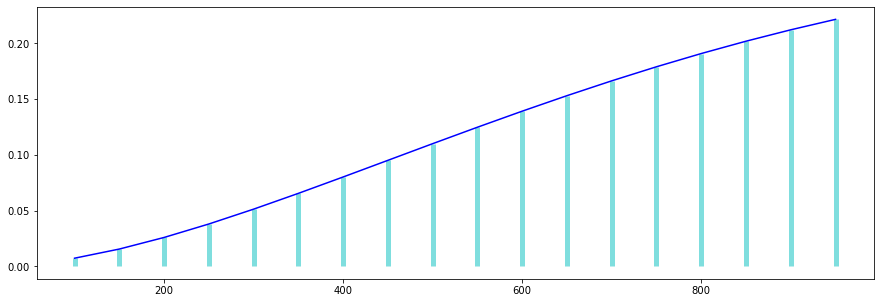

In [387]:
x=range(100,1000,50)
mu=[i*error_mu for i in x]
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,poisson.pmf(2,mu), 'b', ms=8, label='poisson pmf')
ax.vlines(x,0, poisson.pmf(2,mu), colors='c', lw=5, alpha=0.5)


**As the number of words increase probability of getting errors increases**

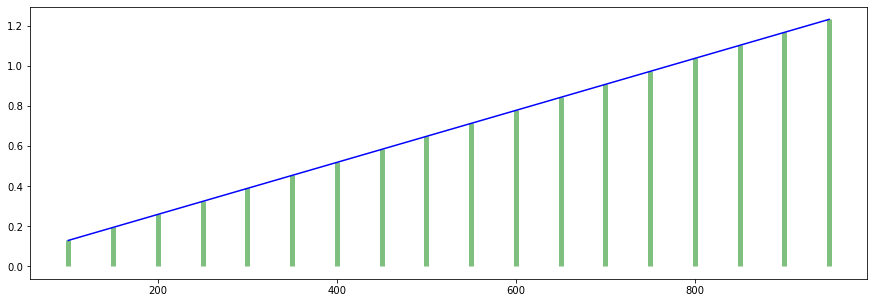

In [388]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,mu, 'b', ms=8, label='poisson pmf')
ax.vlines(x,0,mu, colors='g', lw=5, alpha=0.5)


**As the number of words increase the  mu value increasing**

**Problem Statement 9:**

Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF, f(d) =
20e−20(d−12.5), d ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm?
What is the conclusion of this experiment?

In [389]:
from scipy import integrate

import warnings

#suppress warnings
warnings.filterwarnings('ignore')
PDF=lambda d:20*(np.exp((-20*(d-12.5))))
x = 12.6
P_x=integrate.quad(PDF,x,np.inf)
y = 11
CDF=integrate.quad(PDF,-np.inf,y)
print(f"Parts need to scrapped when d >12.6mm is :{P_x[0]}, {P_x[1]}")

print(f"CDF when d= 11mm is:{CDF[0]},{CDF[1]}")

Parts need to scrapped when d >12.6mm is :0.13533528323661398, 1.4196407407851444e-09
CDF when d= 11mm is:inf,inf


**Conclusion:**

The given function [PDF (𝑑) = 20𝑒−20(𝑑−12.5)] is to achieve 12.5 mm diameter for an aluminum sheet.
If a part with diameter < 12.5, then the part should be reworked.
PDF is not defined for d=11

**Problem Statement 10:**

Please compute the following:
    
a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)

b) Find the value z such that P(Z > z) = 0.05

c) Find the value of z such that P(−z < Z < z) = 0.99

In [390]:
from scipy.stats import norm
def P(z,b=-np.inf) :
    return integrate.quad(norm.pdf,b,z)[0]
x= 1-P(1.26)
y=P(-0.86)
z_=(1-P(-1.37))
w=P(0.37,b=-1.25)
v=P(-4.6)
print('P(Z>1.26)=%.6f'%x)
print('P(Z<-0.86)=%.6f'%y)
print('P(Z>-1.37) =%.6f'%z_)
print('P(−1.25 < Z < 0.37) =%.6f '%w)
print('P(Z ≤ −4.6) =%.6f'%v)

P(Z>1.26)=0.103835
P(Z<-0.86)=0.194895
P(Z>-1.37) =0.914657
P(−1.25 < Z < 0.37) =0.538659 
P(Z ≤ −4.6) =0.000002


In [391]:
print('P(Z>z)=0.05 is %.2f'%(-1*norm.ppf(0.05)))
print('𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is %.2f'%(abs(norm.ppf(0.005))))

P(Z>z)=0.05 is 1.64
𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is 2.58


**Problem Statement 11:**

The current flow in a copper wire follow a normal distribution with a mean of 10 mA
and a variance of 4 (mA)2.
What is the probability that a current measurement will exceed 13 mA? What is the
probability that a current measurement is between 9 and 11mA? Determine the
current measurement which has a probability of 0.98.

In [392]:
mean = 10
std = np.sqrt(4)
print(std)
def I(z, b=-np.inf):
    z = (z-mean)/std
    return integrate.quad(norm.pdf,b,z)[0]
print("Probability that a current measurement will exceed 13 mA=",1-I(13))

z9_score= (9-10)/2
print('Z-score for 9 mA current is=',z9_score)

z11_score= (11-10)/2
print('Z-score for 11 mA current is=',z11_score)
def P2(z,b=-np.inf) :
    return integrate.quad(norm.pdf,b,z)[0]
p_z9=P2(z9_score)

p_z11=P2(z11_score)

print('P(Z < -0.5) =%.3f'%p_z9)
print('P(Z < 0.5) =%.3f'%p_z11)
print('[P(-0.5< Z < 0.5)]:Probability that a current measurement is between 9 mA and 11 mA ==%.3f'%(p_z11-p_z9))

#Determine the current measurement which has a probability of 0.98.
#P(Z < z) = 0.98

#Using tables, z comes around 2.05

#P(Z < z) = 0.98
z=2.05
#z=(x-𝜇)/𝜎

#z =(𝑥−𝜇)/𝜎 ⟹ 𝑥 = 𝑧∗𝜎+𝜇

x= z*2+10
print(f"Determine the current measurement which has a probability of 0.98 is {x}𝑚𝐴")

2.0
Probability that a current measurement will exceed 13 mA= 0.06680720126885797
Z-score for 9 mA current is= -0.5
Z-score for 11 mA current is= 0.5
P(Z < -0.5) =0.309
P(Z < 0.5) =0.691
[P(-0.5< Z < 0.5)]:Probability that a current measurement is between 9 mA and 11 mA ==0.383
Determine the current measurement which has a probability of 0.98 is 14.1𝑚𝐴


Mean current is 10 mA

Variance is 4 mA

Standard deviation is 4^(1/2) = 2 mA

Z-score for 13 mA current is  (13-10)/2 = 1.5

We need to find P(Z > z)= P(Z > 1.5) = 1 - P(Z < 1.5)

Using tables, we find that P(Z < 1.5) is 0.933. So probability of P(Z > 1.5) is 1 - 0.933 = 0.067.

Probability that a current exceeding 13 mA will flow is 0.067

Z-score for 9 mA current is  (9-10)/2 = -0.5

Z-score for 11 mA current is  (11-10)/2 = 0.5

P(-0.5< Z < 0.5) = P(Z < 0.5) - P(Z < -0.5) = 0.691 - 0.309 = 0.382 ≈ 0.38

P(Z < z) = 0.98

Using tables, z comes around 2.05

P(Z < z) = 0.98

z value from table: 2.05

z =(𝑥−𝜇)/𝜎 ⟹ 𝑥 = 𝑧∗𝜎+𝜇

Determine the current measurement which has a probability of 0.98. x=(2.05∗2+10)=14.1𝑚𝐴

**Problem Statement 12:**

The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch
and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓
0.0015 inch. What proportion of shafts are in sync with the specifications? If the
process is centered so that the mean is equal to the target value of 0.2500, what
proportion of shafts conform to the new specifications? What is your conclusion from
this experiment?

In [393]:
mean=0.2508
std=0.0005
#specified dia in the range of 0.2485<d<0.2515
#case-1 if mean_dia=0.2508

a=float(0.2485-0.2508)/float(std)
b=float(0.2515-0.2508)/float(std)
print("Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:",a)
print("Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:",b)

from scipy.stats import norm
def P1(z,b=-np.inf) :
    return integrate.quad(norm.pdf,b,z)[0]
z1=P1(1.4)
z2=P1(-4.6)
print('P(z<1.4)=%.2f'%z1)
print('P(z<-4.6)=%.2f'%z2)

print('P(-4.6< Z < 1.4)=%.2f'%(z1-z2))

Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter: -4.6000000000000485
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter: 1.3999999999999568
P(z<1.4)=0.92
P(z<-4.6)=0.00
P(-4.6< Z < 1.4)=0.92


**Conclusion :**

Mean diameter is 0.2508 inch

Standard deviation is 0.0005 inch

Z-score for (0.2500 - 0.0015) 0.2485 is (0.2485−0.25080)/.0005=−4.6

Z-score for (0.2500 + 0.0015) 0.2515 is (0.2515−0.25080)/.0005=1.4

 P(-4.6< Z < 1.4)=𝑃(𝑍<1.4)−𝑃(𝑍<−4.6)=0.92.

**P value is 0.92, so the shafts are in sync**

In [394]:
a1=float(0.2485-0.2500)/float(std)
b1=float(0.2515-0.2500)/float(std)
print("Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:",a1)
print("Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:",b1)

from scipy.stats import norm
def P1(z,b=-np.inf) :
    return integrate.quad(norm.pdf,b,z)[0]
z3=P1(a1)
z4=P1(b1)
print('P(z < 3)=%.5f'%z3)
print('P(z <- 3)=%.5f'%z4)

print('P(-3 < Z < 3)=%.5f'%(z4-z3))

Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter: -3.0000000000000027
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter: 3.0000000000000027
P(z < 3)=0.00135
P(z <- 3)=0.99865
P(-3 < Z < 3)=0.99730


**Conclusion:**

 mean=0.2500

Z-score for (0.2500 - 0.0015) 0.2485 is (0.2485-0.2500)/(0.0005) = -3

Z-score for (0.2500 + 0.0015) 0.2515 is (0.2515-0.2500)/(0.0005) = 3

P(-3< Z < 3) = P(Z < 3) - P(Z < -3) = 0.9973.

So, 0.997 of the shafts are in sync



If mean changes is from 0.2508 to 0.2500, then the proportion of shaft increases from 92% to 99.73%